# Введение в регрессионный анализ: интенсив по Python

*Алла Тамбовцева*

## Семинар 6. Операции с датафреймами Pandas: часть 4

In [1]:
import pandas as pd

В файле `elections_agg.xlsx` (скачать [здесь](https://disk.yandex.ru/d/PDW3Vb3HXBeO3g)) сохранены результаты выборов в Государственную Думу в разрезе территориальных избирательных комиссий (одна строка – одна комиссия). Переменные в файле:

* `okrug`: название федерального округа;
* `region`: название региона;
* `tik`: название ТИК;
* `total`: число зарегистрированных избирателей;
* `turnout`: явка.

Далее – столбцы с числом голосов за партии:

* `КПРФ`: политическая партия "КОММУНИСТИЧЕСКАЯ ПАРТИЯ РОССИЙСКОЙ ФЕДЕРАЦИИ";
* `ЗЕЛЕНЫЕ`: политическая партия "Российская экологическая партия "ЗЕЛЁНЫЕ";
* `ЛДПР`: политическая партия ЛДПР – Либерально-демократическая партия России;
* `НЛ`: политическая партия "НОВЫЕ ЛЮДИ";
* `ЕР`: всероссийская политическая партия "ЕДИНАЯ РОССИЯ";
* `СР`: партия СПРАВЕДЛИВАЯ РОССИЯ – ЗА ПРАВДУ;
* `ЯБЛОКО`: политическая партия "Российская объединенная демократическая партия "ЯБЛОКО";
* `ПР`: всероссийская политическая партия "ПАРТИЯ РОСТА";
* `РПСС`: политическая партия РОССИЙСКАЯ ПАРТИЯ СВОБОДЫ И СПРАВЕДЛИВОСТИ;
* `КР`: политическая партия КОММУНИСТИЧЕСКАЯ ПАРТИЯ КОММУНИСТЫ РОССИИ;
* `ГП`: политическая партия "Гражданская Платформа";
* `ЗА`: политическая партия ЗЕЛЕНАЯ АЛЬТЕРНАТИВА;
* `РОДИНА`: "ВСЕРОССИЙСКАЯ ПОЛИТИЧЕСКАЯ ПАРТИЯ "РОДИНА".

Далее – столбцы с процентами голосов за партии (`КПРФ%` - `РОДИНА%`).

Загрузите данные из файла `elections_agg.xlsx` и сохраните в датафрейм `data`.

*Подсказка:* функция `read_excel()` из `pandas`.

In [2]:
data = pd.read_excel("elections_agg.xlsx")
data

,Unnamed: 0,okrug,region,tik,total,turnout,КПРФ,ЗЕЛЕНЫЕ,ЛДПР,НЛ,...,НЛ%,ЕР%,СР%,ЯБЛОКО%,ПР%,РПСС%,КР%,ГП%,ЗА%,РОДИНА%
0,0,Сибирский федеральный округ,Алтайский край,Алейская,11743,6861,1557,32,743,213,...,3.104504,48.156245,6.777438,0.480979,0.160326,0.495555,2.040519,0.145751,0.276928,0.393529
1,1,Сибирский федеральный округ,Алтайский край,Алейская городская,21076,9590,2556,53,906,465,...,4.848801,40.198123,7.924922,0.677789,0.208551,0.500521,2.950991,0.072993,0.594369,0.396246
2,2,Сибирский федеральный округ,Алтайский край,Алтайская,19006,8531,2519,45,821,573,...,6.716680,36.256008,8.263978,0.363381,0.199273,0.480600,2.449889,0.046888,0.281327,0.281327
3,3,Сибирский федеральный округ,Алтайский край,Баевская,7654,3649,1465,22,311,124,...,3.398191,32.967936,5.727597,0.301452,0.164429,0.383667,2.247191,0.027405,0.219238,0.465881
4,4,Сибирский федеральный округ,Алтайский край,"Барнаул, Вторая Индустриальная",95660,30619,10368,307,2140,2981,...,9.735785,28.436592,8.919298,1.848525,0.316797,0.594402,1.851791,0.035925,0.679317,1.136549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846,2846,Южный федеральный округ,город Севастополь,Балаклавская,42846,19947,2293,169,1750,632,...,3.168396,61.247305,7.058706,0.596581,0.230611,0.506342,0.772046,0.060159,0.355943,0.521382
2847,2847,Южный федеральный округ,город Севастополь,Гагаринская,107421,41345,6127,620,3560,2098,...,5.074374,53.493772,8.644334,0.662716,0.319265,0.679647,0.643367,0.072560,0.544201,0.919095
2848,2848,Южный федеральный округ,город Севастополь,Дистанционное электронное голосование,20772,18621,1754,814,1793,1399,...,7.513023,53.788733,8.377638,0.767950,0.445733,0.703507,0.601471,0.102035,1.428495,0.773320
2849,2849,Южный федеральный округ,город Севастополь,Ленинская,83249,43298,5281,551,3145,1992,...,4.600674,58.947295,7.487644,0.739064,0.367223,0.706730,0.792184,0.309483,0.776017,0.884567


### Задача 1

Выведите таблицу частот для столбца `okrug`. Сколько районов (ТИКов) в Сибирском федеральном округе?

In [3]:
data["okrug"].value_counts() # 388

Центральный федеральный округ          697
Приволжский федеральный округ          619
Сибирский федеральный округ            388
Северо-Западный федеральный округ      276
Дальневосточный федеральный округ      247
Южный федеральный округ                247
Уральский федеральный округ            223
Северо-Кавказский федеральный округ    154
Name: okrug, dtype: int64

### Задача 2

Сравните результаты сортировки строк в `data`:

* сортировки только по федеральному округу;
* сортировки по федеральному округу и региону.

In [5]:
# для наглядности добавляем .head(20), чтобы 
# после сортировки увидеть только первые 20 строк и сравнить

data.sort_values("okrug").head(20)

,Unnamed: 0,okrug,region,tik,total,turnout,КПРФ,ЗЕЛЕНЫЕ,ЛДПР,НЛ,...,НЛ%,ЕР%,СР%,ЯБЛОКО%,ПР%,РПСС%,КР%,ГП%,ЗА%,РОДИНА%
2606,2606,Дальневосточный федеральный округ,Чукотский автономный округ,Анадырская городская,9183,4685,765,80,865,294,...,6.275347,34.343650,8.068303,0.853789,0.683031,0.917823,1.686233,0.234792,1.985059,0.875133
1748,1748,Дальневосточный федеральный округ,Республика Саха (Якутия),Оленекская,2135,1570,538,6,27,55,...,3.503185,48.535032,6.369427,0.700637,0.191083,0.318471,1.656051,0.000000,0.254777,0.063694
1749,1749,Дальневосточный федеральный округ,Республика Саха (Якутия),Среднеколымская,5354,2911,560,13,190,254,...,8.725524,43.558914,13.740982,0.652697,0.206115,0.377877,1.408451,0.137410,0.377877,0.309172
1750,1750,Дальневосточный федеральный округ,Республика Саха (Якутия),Сунтарская,15880,9143,3576,52,141,609,...,6.660833,41.638412,5.326479,0.382807,0.087499,0.328120,1.443727,0.164060,0.284371,0.109373
1751,1751,Дальневосточный федеральный округ,Республика Саха (Якутия),Таттинская,10488,6728,2766,36,118,433,...,6.435791,39.060642,6.183115,0.475624,0.089180,0.326992,1.501189,0.163496,0.267539,0.104043
389,389,Дальневосточный федеральный округ,Забайкальский край,Шилкинская,30545,12057,2497,84,1743,1222,...,10.135191,35.232645,7.978768,0.497636,0.298582,0.622045,2.123248,0.116115,0.290288,0.771336
388,388,Дальневосточный федеральный округ,Забайкальский край,Шелопугинская,5576,2793,416,24,365,240,...,8.592911,47.869674,5.155747,0.572861,0.680272,0.501253,1.539563,0.071608,0.214823,0.429646
387,387,Дальневосточный федеральный округ,Забайкальский край,Читинская 44,21554,7490,1629,82,1094,642,...,8.571429,32.603471,10.173565,0.774366,0.173565,0.534045,1.602136,0.253672,0.507343,0.507343
386,386,Дальневосточный федеральный округ,Забайкальский край,Читинская 43,30243,8610,2022,101,1084,911,...,10.580720,32.845528,9.221835,0.418118,0.336818,0.441347,1.672474,0.046458,0.545877,0.662021
385,385,Дальневосточный федеральный округ,Забайкальский край,"Чита, Черновская",62495,22451,4585,233,2276,1738,...,7.741303,39.860140,10.248987,0.445414,0.182620,0.512227,1.737116,0.066812,0.485502,0.726026


In [7]:
# для наглядности добавляем .head(40), чтобы 
# после сортировки увидеть только первые 40 строк и сравнить

data.sort_values(["okrug", "region"]).head(40)

,Unnamed: 0,okrug,region,tik,total,turnout,КПРФ,ЗЕЛЕНЫЕ,ЛДПР,НЛ,...,НЛ%,ЕР%,СР%,ЯБЛОКО%,ПР%,РПСС%,КР%,ГП%,ЗА%,РОДИНА%
75,75,Дальневосточный федеральный округ,Амурская область,Архаринского района,11937,4729,1265,43,786,252,...,5.328822,33.643476,4.800169,0.380630,0.296046,0.528653,2.072320,0.105731,0.296046,0.380630
76,76,Дальневосточный федеральный округ,Амурская область,Белогорского округа,13303,5609,1414,21,852,268,...,4.778035,40.381530,3.904439,0.320913,0.160456,0.445712,2.531646,0.035657,0.267427,0.534855
77,77,Дальневосточный федеральный округ,Амурская область,Благовещенского района,23875,8190,2128,58,1345,700,...,8.547009,31.953602,6.410256,0.610501,0.195360,0.818071,1.929182,0.158730,0.561661,0.378510
78,78,Дальневосточный федеральный округ,Амурская область,Бурейского округа,17823,7916,2119,52,1361,458,...,5.785750,32.554320,4.749874,0.328449,0.265285,0.745326,2.829712,0.189490,0.290551,0.353714
79,79,Дальневосточный федеральный округ,Амурская область,ЗАТО Циолковский,3686,2036,528,26,349,152,...,7.465619,26.866405,5.009823,0.638507,0.196464,0.687623,1.817289,0.049116,1.277014,0.736739
80,80,Дальневосточный федеральный округ,Амурская область,Завитинского округа,11558,5309,1475,17,710,305,...,5.744961,34.865323,4.426446,0.320211,0.301375,0.772273,3.409305,0.075344,0.414391,0.320211
81,81,Дальневосточный федеральный округ,Амурская область,Зейского района,13207,7412,1309,46,1022,365,...,4.924447,43.550998,5.760928,1.146789,0.337291,0.944414,3.413384,0.242849,0.580140,0.472207
82,82,Дальневосточный федеральный округ,Амурская область,Ивановского округа,18223,8422,1990,38,1131,453,...,5.378770,40.322964,5.366896,0.356210,0.237473,0.439326,2.161007,0.166231,0.356210,0.605557
83,83,Дальневосточный федеральный округ,Амурская область,Константиновского района,9651,5044,1099,37,865,250,...,4.956384,36.280730,5.670103,0.337034,0.237906,0.674068,2.577320,0.277557,0.535289,0.376685
84,84,Дальневосточный федеральный округ,Амурская область,Магдагачинского района,16783,7001,2433,50,760,372,...,5.313527,30.338523,4.827882,0.385659,0.228539,0.714184,3.056706,0.071418,0.485645,0.371376


### Задача 3

* Добавьте в `data` столбец `КП%` – сумму процентов голосов за коммунистические партии (КПРФ и «Коммунисты России»). 

* Добавьте в `data` столбец `ЭКО%` – суммы процентов за экологические партии («Зеленые» и «Зеленая альтернатива»).

Постройте ящики с усами для добавленных столбцов  – отдельный график для каждого столбца.

In [8]:
data["КП%"] = data["КПРФ%"] + data["КР%"]
data["ЭКО%"] = data["ЗЕЛЕНЫЕ%"] + data["ЗА%"]

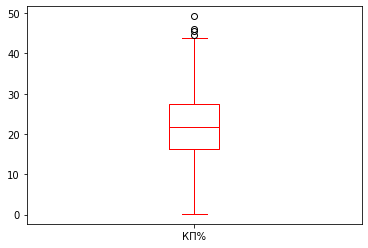

In [9]:
data["КП%"].plot.box(color = "red");

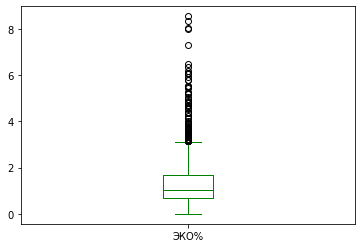

In [10]:
data["ЭКО%"].plot.box(color = "green");

### Задача 4

Сгруппируйте строки в `data` по федеральному округу и выведите описательные статистики для процента голосов за экологические партии.

In [11]:
data.groupby("okrug")["ЭКО%"].describe()

,count,mean,std,min,25%,50%,75%,max
okrug,,,,,,,,
Дальневосточный федеральный округ,247.0,1.404414,0.724282,0.247831,0.926710,1.290457,1.692985,6.052963
Приволжский федеральный округ,619.0,0.932027,0.621506,0.021186,0.510307,0.783766,1.175885,4.807692
Северо-Западный федеральный округ,276.0,1.769428,0.682310,0.391645,1.231165,1.723759,2.263234,4.704859
Северо-Кавказский федеральный округ,154.0,0.423929,0.368370,0.000000,0.141571,0.337186,0.553349,1.883122
Сибирский федеральный округ,388.0,1.448927,1.236933,0.000000,0.785192,1.030726,1.740366,8.543923
Уральский федеральный округ,223.0,1.185922,0.571916,0.072089,0.814474,1.062253,1.504902,3.256361
Центральный федеральный округ,697.0,1.545484,1.018030,0.028023,0.795707,1.257835,2.190337,6.187596
Южный федеральный округ,247.0,1.007478,0.630407,0.044900,0.581088,0.881057,1.314038,5.799903


### Задача 5

Сгруппируйте строки в `data` по региону, выберите столбцы `turnout` и `total`, посчитайте по ним сумму. Полученную таблицу сохраните в переменную `data_agg`.

In [12]:
data_agg = data.groupby("region")[["turnout", "total"]].sum()
data_agg

,turnout,total
region,,
Алтайский край,739460,1806679
Амурская область,254658,612971
Архангельская область,364779,877875
Астраханская область,315458,725572
Белгородская область,724020,1226298
...,...,...
Ямало-Ненецкий автономный округ,253294,376862
Ярославская область,434921,1006556
город Москва,3845170,7770014


### Задача 6

Добавьте в `data_agg` столбец `turnout%` с явкой в процентах. Вычислите среднее по полученному столбцу и сохраните в переменную `avg`.

In [13]:
data_agg["turnout%"] = data_agg["turnout"] / data_agg["total"] * 100
avg = data_agg["turnout%"].mean()
print(avg)

52.128249922829575


### Задача 7

Добавьте в `data_agg` столбец `high` из 0 и 1, где 1 ставится, если явка в процентах в регионе выше средней.

In [14]:
data_agg["high"] = (data_agg["turnout%"] > avg).astype(int)
data_agg

,turnout,total,turnout%,high
region,,,,
Алтайский край,739460,1806679,40.929241,0
Амурская область,254658,612971,41.544869,0
Архангельская область,364779,877875,41.552499,0
Астраханская область,315458,725572,43.477146,0
Белгородская область,724020,1226298,59.041114,1
...,...,...,...,...
Ямало-Ненецкий автономный округ,253294,376862,67.211340,1
Ярославская область,434921,1006556,43.208823,0
город Москва,3845170,7770014,49.487298,0


### Задача 8

Отсортируйте строки в `data_agg` по убыванию явки в процентах и сохраните изменения.

In [15]:
# data_agg = ... пересохраняем результат сортировки в data_agg

data_agg = data_agg.sort_values("turnout%", ascending = False)
data_agg

,turnout,total,turnout%,high
region,,,,
Чеченская Республика,731968,775256,94.416296,1
Карачаево-Черкесская Республика,268928,301151,89.300052,1
Республика Северная Осетия - Алания,450520,520743,86.514845,1
Кабардино-Балкарская Республика,462254,539787,85.636371,1
Республика Дагестан,1435096,1699609,84.436832,1
...,...,...,...,...
Владимирская область,417788,1103455,37.861807,0
Новосибирская область,815311,2161918,37.712392,0
Республика Хакасия,148110,394707,37.524037,0
